<a href="https://colab.research.google.com/github/Sompote/pile_deep_learning/blob/main/pile_gen_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#preparation of pile data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from keras.layers import Activation, Dense,Flatten,LSTM,Dropout, GRU
import warnings
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.preprocessing import MinMaxScaler, StandardScaler


df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/pile_all.csv')

data=np.array(df)
select_data=data[0:26,0:2]
select_data

array([[ 0.00000e+00,  0.00000e+00],
       [ 1.63310e+02, -5.61000e-01],
       [ 4.42320e+02, -1.65600e+00],
       [ 6.09730e+02, -2.08100e+00],
       [ 8.03830e+02, -2.96400e+00],
       [ 1.00524e+03, -5.24300e+00],
       [ 1.17752e+03, -6.59800e+00],
       [ 1.36680e+03, -8.87900e+00],
       [ 1.55606e+03, -1.04630e+01],
       [ 1.55615e+03, -1.46540e+01],
       [ 1.76970e+03, -1.71620e+01],
       [ 2.00753e+03, -2.08290e+01],
       [ 2.02700e+03, -2.38510e+01],
       [ 2.17022e+03, -2.80070e+01],
       [ 2.17514e+03, -3.08000e+01],
       [ 2.32324e+03, -3.61190e+01],
       [ 2.34308e+03, -5.63710e+01],
       [ 2.36283e+03, -7.24320e+01],
       [ 2.38260e+03, -8.94240e+01],
       [ 2.39014e+03, -1.01763e+02],
       [ 2.41224e+03, -1.14098e+02],
       [ 2.41977e+03, -1.25738e+02],
       [ 2.44431e+03, -1.38771e+02],
       [ 2.45667e+03, -1.49479e+02],
       [ 2.46659e+03, -1.59488e+02],
       [ 2.47891e+03, -1.68566e+02]])

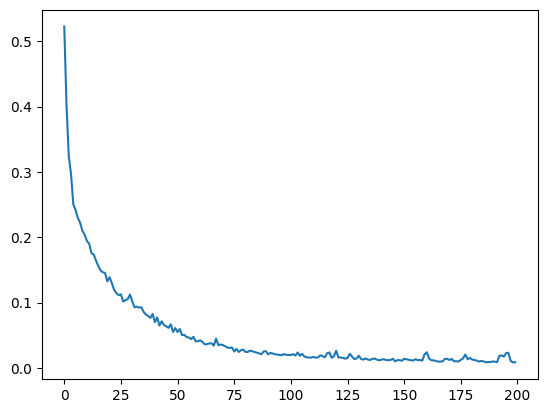

In [34]:
def scaler(xtrain1,y_train1):#scale data
  #scaler
  scaler_x = MinMaxScaler(feature_range=(-1,1))
  scaler_y = MinMaxScaler(feature_range=(-1,1))
  train_data_x = scaler_x.fit_transform(xtrain1)
  train_data_y=scaler_y.fit_transform(y_train1)
  return train_data_x, train_data_y, scaler_x, scaler_y

#Build the DL model
def model_fit(x_train,y_train):
  model_test = Sequential()
  model_test.add(Dense(50, activation="relu",input_dim=x_train.shape[1]))
  model_test.add(Dense(50))



  model_test.add(Dense(y_train.shape[1]))
  # Compile the model
  model_test.compile(optimizer='Adam', loss='mse',metrics=['mape'])
  history = model_test.fit(x_train, y_train, batch_size=3, epochs=200,verbose=0)
  #scores = model_dll.evaluate(x_test, y_test, verbose=0)
  plt.plot(history.history['loss'])
  return model_test

def predict_value(model,scaler_x,scaler_y,input): #predict_data
#prediciton
  input_scale=scaler_x.transform(input)
  predict = model.predict([input_scale])
  pre_nonscale=scaler_y.inverse_transform(predict)
  return pre_nonscale

ks=df


xi=select_data[:,1]
xi=np.reshape(xi,(-1,1))
yi=select_data[:,0]
yi=np.reshape(yi,(-1,1))


x_train, y_train, scaler_x, scaler_y =scaler(xi,yi)
model_test=model_fit(x_train,y_train)


7/7 [==============================] - 0s 2ms/step


Text(0, 0.5, 'settlement (mm)')

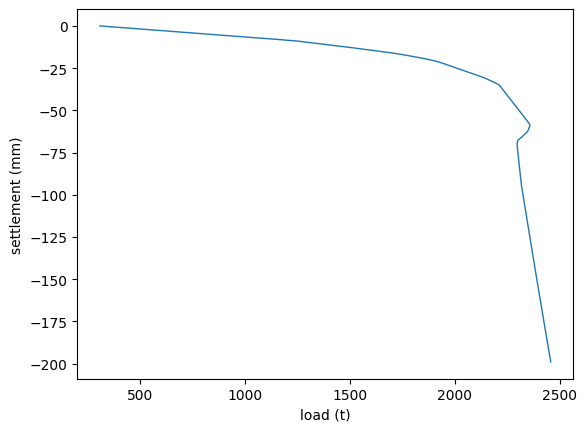

In [37]:
#chcek model
x_predict=numbers = np.reshape(np.arange(0, -200, -1),(-1,1))

y_predict=predict_value(model_test,scaler_x,scaler_y,x_predict)
plt.plot(y_predict,x_predict,linewidth=1)
plt.xlabel("load (t)")
plt.ylabel("settlement (mm)")